## Downloading tickers


In [17]:
!pip install ticker
!pip install ticker.company

  Created wheel for ticker: filename=ticker-0.13-py3-none-any.whl size=3752 sha256=78112127950d9f997eeaa1ef314ad81d1c04306b80c119e43499dfcf9e457d3b
  Stored in directory: /root/.cache/pip/wheels/9e/18/c6/a3df0fe6e71ceaa924fe5f75399682d2e347c082c744e60a9c
Successfully built ticker
ERROR: Could not find a version that satisfies the requirement ticker.company (from versions: none)
ERROR: No matching distribution found for ticker.company


In [18]:
!pip install yfinance
!pip install yahoofinancials
!pip install ta

     |████████████████████████████████| 6.3 MB 6.1 MB/s 
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15190 sha256=79b2bb44b75f1d6a16f6a181da1a68e93702d76dd416e42b88e9b9df6cd3e43e
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials
  Created wheel for ta: filename=ta-0.8.0-py3-none-any.whl size=28895 sha256=a21711a729fe29588c3404026060526cb60d82d15b68d33eefe28670a6ae9376
  Stored in directory: /root/.cache/pip/wheels/7e/da/86/65cba22446ae2ef148de2079907264ef27feecfb7f51a45e0d
Successfully built ta


In [19]:
import bs4 as bs
import pickle
import requests


def save_tickers():
	resp=requests.get('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
	soup=bs.BeautifulSoup(resp.text)
	table=soup.find('table',{'class':'wikitable sortable'})
	tickers=[]
	for row in table.findAll('tr')[1:]:
		ticker=row.findAll('td')[0].text[:-1]
		tickers.append(ticker)

	with open("tickers.pickle",'wb') as f:
		pickle.dump(tickers, f)


	return tickers

save_tickers()


['MMM',
 'ABT',
 'ABBV',
 'ABMD',
 'ACN',
 'ATVI',
 'ADBE',
 'AMD',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'ANTM',
 'AON',
 'AOS',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ADM',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'ADP',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BLL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CERN',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CTXS',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMC

### Getting Data

In [20]:

import bs4 as bs
import pickle
import requests
import datetime as dt
import os
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf

yf.pdr_override()


def fetch_data():
	with open("tickers.pickle",'rb') as f:
			tickers=pickle.load(f)

	if not os.path.exists('stock_details'):
		os.makedirs('stock_details')
	count=300

	start= dt.datetime(2017,5,11)
	end=dt.datetime(2021,1,4)
	count=0
	for ticker in tickers:
		if count==300:
			break
		count+=1
		print(ticker)
		
		try:
				df=web.get_data_yahoo(ticker, start, end)
				#df=web.DataReader(ticker, 'yahoo', start, end)
				df.to_csv('stock_details/{}.csv'.format(ticker))
		except:
				print("Error")
				continue

		
fetch_data()



MMM
[*********************100%***********************]  1 of 1 completed
ABT
[*********************100%***********************]  1 of 1 completed
ABBV
[*********************100%***********************]  1 of 1 completed
ABMD
[*********************100%***********************]  1 of 1 completed
ACN
[*********************100%***********************]  1 of 1 completed
ATVI
[*********************100%***********************]  1 of 1 completed
ADBE
[*********************100%***********************]  1 of 1 completed
AMD
[*********************100%***********************]  1 of 1 completed
AAP
[*********************100%***********************]  1 of 1 completed
AES
[*********************100%***********************]  1 of 1 completed
AFL
[*********************100%***********************]  1 of 1 completed
A
[*********************100%***********************]  1 of 1 completed
APD
[*********************100%***********************]  1 of 1 completed
AKAM
[*********************100%******************

In [21]:
import os
import pandas as pd
import pickle


def compile():
	with open("tickers.pickle",'rb') as f:
			tickers=pickle.load(f)


	main_df=pd.DataFrame()

	for count,ticker in enumerate(tickers):
		if not os.path.exists('stock_details/{}.csv'.format(ticker)):
			continue
		df=pd.read_csv('stock_details/{}.csv'.format(ticker))
		df.set_index('Date',inplace=True)

		df.rename(columns={'Adj Close': ticker}, inplace=True)
		df.drop(['Open','High','Low',"Close",'Volume'],axis=1,inplace=True)

		
		if main_df.empty:
			main_df=df
		else:
			main_df=main_df.join(df,how='outer')

	print(main_df.head())
	main_df.to_csv('Dataset_all.csv')

compile()

                   MMM        ABT       ABBV  ...         MTB        MRO        MPC
Date                                          ...                                  
2017-05-10         NaN        NaN        NaN  ...         NaN        NaN        NaN
2017-05-11  170.388992  40.650543  52.938618  ...  140.663055  13.624285  43.832573
2017-05-12  170.233170  40.743221  53.554749  ...  140.112549  13.483150  43.966129
2017-05-15  171.151093  40.817383  54.049282  ...  142.536407  13.728641  44.537666
2017-05-16  171.393616  40.492992  54.195202  ...  144.161194  13.624780  44.109013

[5 rows x 300 columns]


In [22]:
import pandas as pd

In [23]:
df_all=pd.read_csv('Dataset_all.csv')

In [24]:
len(df_all.columns)

301

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
df=pd.read_csv('/content/drive/MyDrive/ML Lab Data/dataset_target.csv',index_col=0)

In [27]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,137.279999,134.520004,137.089996,134.520004,4523000,134.520004
2010-01-04,136.610001,133.139999,136.250000,133.899994,7599900,133.899994
2010-01-05,135.479996,131.809998,133.429993,134.690002,8851900,134.690002
2010-01-06,134.729996,131.649994,134.600006,132.250000,7178800,132.250000
2010-01-07,132.320007,128.800003,132.009995,130.000000,11030200,130.000000


Text(0, 0.5, 'Price($)')

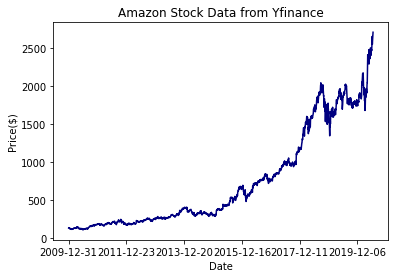

In [28]:
import matplotlib.pyplot as plt
ax = df['Close'].plot(colormap = 'jet', title = 'Amazon Stock Data from Yfinance')
ax.set_xlabel('Date')
ax.set_ylabel('Price($)')

In [29]:
!pip install mpl_finance

In [30]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/ML Lab Data/AMZN.csv',index_col=0,parse_dates=True)

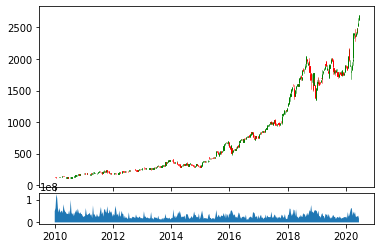

In [31]:
df_ohlc= df['Adj Close'].resample('10D').ohlc()
df_volume=df['Volume'].resample('10D').sum()
df_ohlc.reset_index(inplace=True)
df_ohlc['Date']=df_ohlc['Date'].map(mdates.date2num)



ax1=plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2=plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1 , sharex=ax1)
ax1.xaxis_date()

candlestick_ohlc(ax1,df_ohlc.values, width=2, colorup='g')
ax2.fill_between(df_volume.index.map(mdates.date2num),df_volume.values,0)

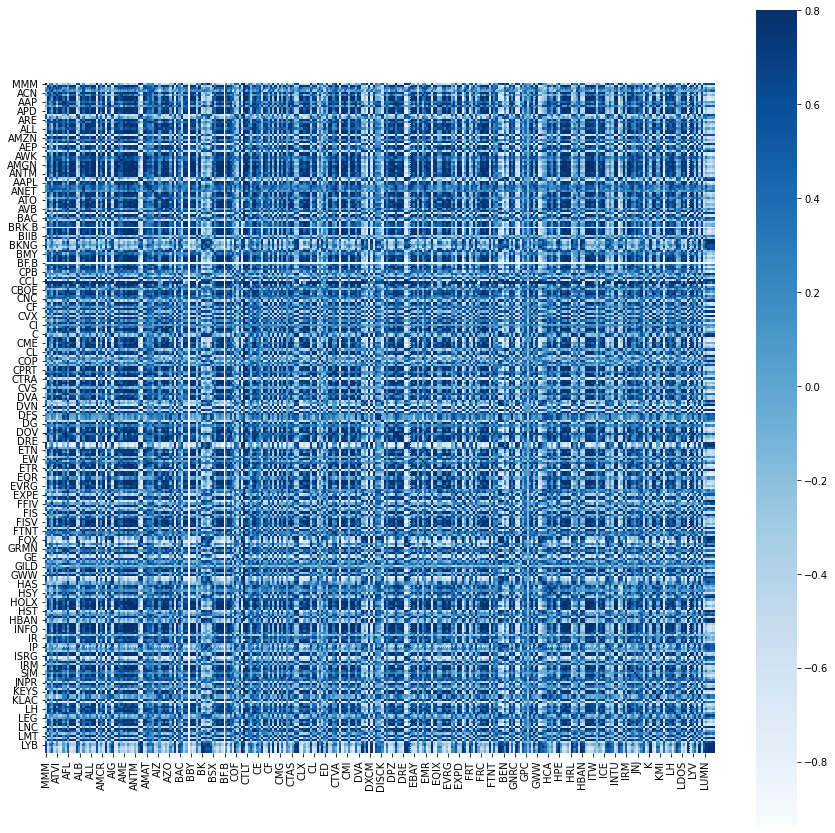

In [32]:
import seaborn as sb
import matplotlib.pyplot as plt
C_mat = df_all.corr()
fig = plt.figure(figsize = (15,15))

sb.heatmap(C_mat, vmax = .8, square = True , cmap="Blues")
plt.savefig("output.jpg")
plt.show()

### Pre-processing

In [33]:
cor = df_all.corr()

In [34]:
cor_target = abs(cor["AMZN"])

In [35]:
relevant_features = cor_target[(cor_target>0.85)]

In [36]:
relevant_features_2 = relevant_features[(cor_target<0.9)]

In [37]:
len(relevant_features_2)

30

In [38]:
relevant_features_2.sort_values(ascending=False, inplace=True)

In [39]:
relevant_features_3=relevant_features_2[:10]

In [40]:
relevant_features_3

APD     0.897653
CTAS    0.891823
HUM     0.891546
BRO     0.887681
CPRT    0.887288
A       0.886988
AJG     0.884857
CHD     0.873466
INFO    0.871807
CCI     0.871362
Name: AMZN, dtype: float64

In [41]:
relevant_tickers=relevant_features_3.keys()

In [42]:
relevant_tickers=list(relevant_tickers)

In [43]:
relevant_tickers

['APD', 'CTAS', 'HUM', 'BRO', 'CPRT', 'A', 'AJG', 'CHD', 'INFO', 'CCI']

In [44]:
df_relevant=df_all[relevant_tickers]

In [45]:
df_relevant.head()

,APD,CTAS,HUM,BRO,CPRT,A,AJG,CHD,INFO,CCI
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,129.447479,116.406746,223.593369,20.406584,29.920000,54.221188,50.396767,47.505856,42.732281,80.899429
2,129.636414,116.178764,224.814423,20.267599,29.889999,54.153690,50.031116,47.242352,42.496193,80.590988
3,130.545242,116.245255,223.961624,20.329903,29.980000,54.674397,50.451611,47.289410,43.017559,82.021851
4,129.888367,116.435257,219.203461,20.363447,29.969999,54.799774,50.561310,46.564766,43.145447,82.193214
